# Detecting attributes (e.g., stereotypes) on the basis on np data
## Data trained on time period: 2000 - 2016

In [6]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE

In [ ]:
#https://radimrehurek.com/gensim/models/keyedvectors.html

# Newspaper: AD

In [4]:
path_all = "/Users/admin/gitprojects/trained_data/all/w2v"
all_np = gensim.models.Word2Vec.load(path_all)

In [1]:
path_all = "/Users/admin/gitprojects/trained_data/all/W2V"

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]

In [ ]:
#import nltk
#nltk.download('punkt')
#from nltk import word_tokenize,sent_tokenize

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_data

In [ ]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
#print("Model Saved")

In [ ]:
model.most_similar('love')
matches = list(filter(lambda x: 'SENT_' in x[0], matches))

In [ ]:
gensim.models

In [ ]:
path_all = "/Users/admin/gitprojects/trained_data/all/w2v"
all_np = gensim.models.Word2Vec.load(path_all)

In [42]:
path_adtel = "/Users/admin/gitprojects/trained_data/type_outlet/word2vec_['telegraaf (print)', 'ad (print)']_2000-01-01_2015-12-31"
tabloid = gensim.models.Word2Vec.load(path_adtel)

In [52]:
qual = quality.wv.vocab["belg"]
qual.count

qual_2 = quality.wv.vocab["belgen"]
qual_2.count

qual.count + qual_2.count


tab = tabloid.wv.vocab["belg"]
tab.count

tab_2 = tabloid.wv.vocab["belgen"]
tab_2.count

qual.count + qual_2.count + tab.count + tab_2.count

45628

In [53]:
qual = all_np.wv.vocab["marokkaan"]
qual.count

qual_2 = all_np.wv.vocab["marokkanen"]
qual_2.count

qual.count + qual_2.count

28066

In [45]:
path_vknrctrouw = "/Users/admin/gitprojects/trained_data/type_outlet/word2vec_['volkskrant (print)', 'nrc (print)', 'trouw (print)']_2000-01-01_2015-12-31"
quality = gensim.models.Word2Vec.load(path_vknrctrouw)

In [ ]:
yr2000 = gensim.models.Word2Vec.load(path + "2000-01-01_2000-12-31")
yr2001 = gensim.models.Word2Vec.load(path + "2001-01-01_2001-12-31")
yr2002 = gensim.models.Word2Vec.load(path + "2002-01-01_2002-12-31")
yr2003 = gensim.models.Word2Vec.load(path + "2003-01-01_2003-12-31")
yr2004 = gensim.models.Word2Vec.load(path + "2004-01-01_2004-12-31")
yr2005 = gensim.models.Word2Vec.load(path + "2005-01-01_2005-12-31")
yr2006 = gensim.models.Word2Vec.load(path + "2006-01-01_2006-12-31")
yr2007 = gensim.models.Word2Vec.load(path + "2007-01-01_2007-12-31")
yr2008 = gensim.models.Word2Vec.load(path + "2008-01-01_2008-12-31")
yr2009 = gensim.models.Word2Vec.load(path + "2009-01-01_2009-12-31")
yr2010 = gensim.models.Word2Vec.load(path + "2010-01-01_2010-12-31")
yr2011 = gensim.models.Word2Vec.load(path + "2011-01-01_2011-12-31")
yr2012 = gensim.models.Word2Vec.load(path + "2012-01-01_2012-12-31")
yr2013 = gensim.models.Word2Vec.load(path + "2013-01-01_2013-12-31")
yr2014 = gensim.models.Word2Vec.load(path + "2014-01-01_2014-12-31")
yr2015 = gensim.models.Word2Vec.load(path + "2015-01-01_2015-12-31")

In [ ]:
len(all_np.wv.vocab)

In [7]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
marokkaan = list(quality.wv.most_similar(positive=['belg', 'belgen'], topn=100))
marokkaan = list(quality.wv.most_similar(positive=['marokaan', 'marokkanen'], topn=100))

#nederlander = list(tabloid.wv.most_similar(positive=['nederlander', 'nederlanders'], topn=50))
#targets = marokkaan + nederlander
targets = marokkaan

word_list = []
for i in targets:
    word, score = i
    word_list.append(word)

d = quality.wv.vocab
#most_similar = []
newdict = {key:d[key] for key in word_list}

vocab = list(newdict)
X = all_np[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)

In [ ]:
df

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('/Users/admin/surfdrive/Werk/projects/mediabias_p2/data/belgen_quality.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

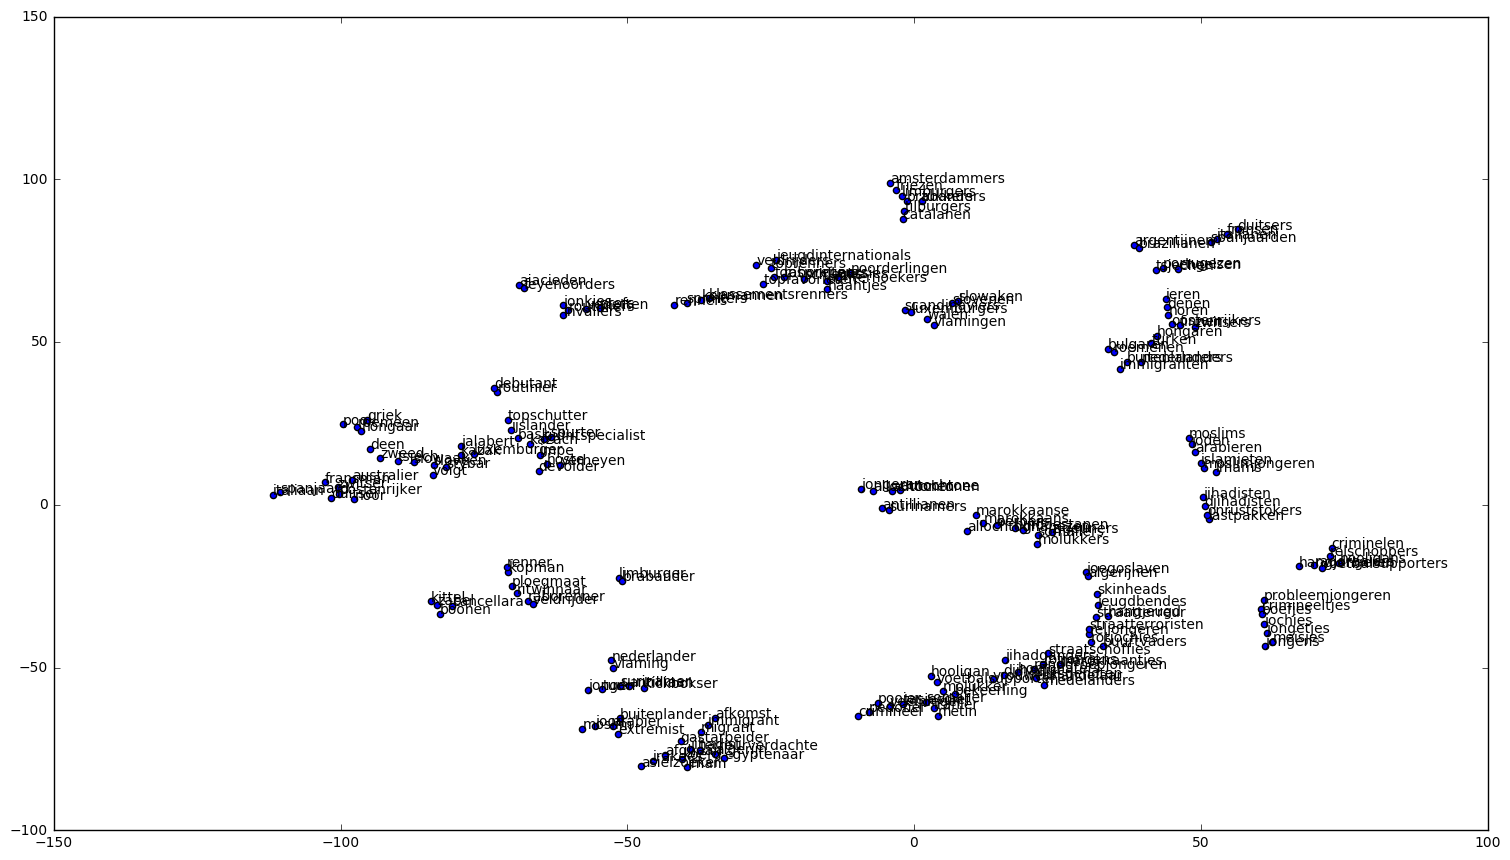

In [3]:
turk = list(all_np.wv.most_similar(positive=['belg', 'belgen'], topn=100))
list2 = list(all_np.wv.most_similar(positive=['marokkaan', 'marokkanen'], topn=100))

#nederlander = list(tabloid.wv.most_similar(positive=['nederlander', 'nederlanders'], topn=50))
#targets = marokkaan + nederlander
targets = turk + list2

word_list = []
for i in targets:
    word, score = i
    word_list.append(word)

d = all_np.wv.vocab
#most_similar = []
try:
    newdict = {key:d[key] for key in word_list}
except KeyError:
     pass
    
vocab = list(newdict)
X = all_np[vocab]

tsne = TSNE(n_components=2, perplexity=3, init='pca', n_iter=3500, random_state=32)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)

NameError: name 'all_np' is not defined

In [58]:
l = all_np.wv.most_similar(positive=['belg', 'belgen'], topn=100)
for i in l:
    print(i[0])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


fransen
duitser
italianen
spanjaarden
noren
zweed
fransman
tsjechen
oostenrijkers
duitsers
vlamingen
denen
zwitser
routinier
luxemburger
griek
nederlander
tsjech
portugezen
aussies
vlaming
oostenrijker
slowaak
schlecks
raborenner
engelsen
limburgers
haantjes
achterhoekers
deen
finnen
catalanen
roemenen
noor
renners
ajacieden
sprinters
italiaan
friezen
hoste
roemeen
noorderlingen
brabander
sloveen
hongaar
routiniers
stybar
luxemburgers
brazilianen
raborenners
topsprinters
spanjaard
scandinaviers
cancellara
debutant
slovenen
kopmannen
argentijnen
kazak
brabanders
zabel
profs
limburger
ijslander
renner
veldrijder
topfavorieten
ploegmaat
kopman
kazach
zwitsers
bask
tijdritspecialist
feyenoorders
invallers
ieren
klassementsrenners
jeugdinternationals
walen
impe
toprenners
veldrijders
amsterdammers
slowaken
ritwinnaar
pool
vedetten
tukkers
verheyen
jonkies
tilburgers
topschutter
kittel
australier
spurter
hongaren
boonen
devolder
voigt
jalabert


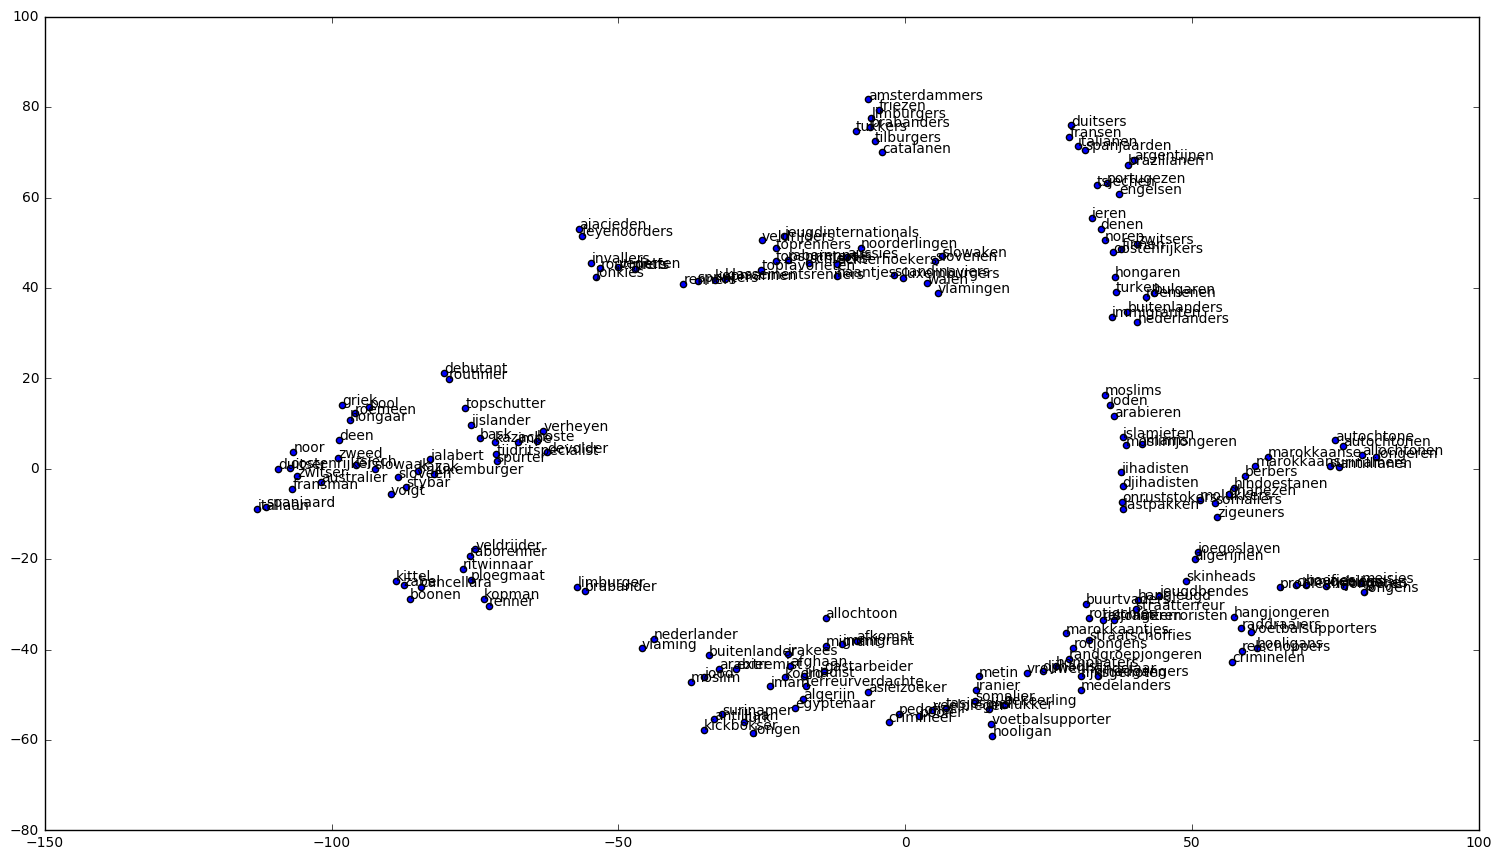

In [21]:
fig.set_size_inches(18.5, 10.5)
fig

In [22]:
from pandas import ExcelWriter
writer = ExcelWriter('/Users/admin/surfdrive/Werk/projects/mediabias_p2/data/belg_3.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [1]:
keys = ['marokkaan', 'marokkanen', 'belg', 'belgen']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in all_np.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(all_np[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

NameError: name 'all_np' is not defined

In [2]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

ValueError: not enough values to unpack (expected 3, got 1)

In [62]:
#df = pd.DataFrame.from_records(embeddings_en_2d, index=words)

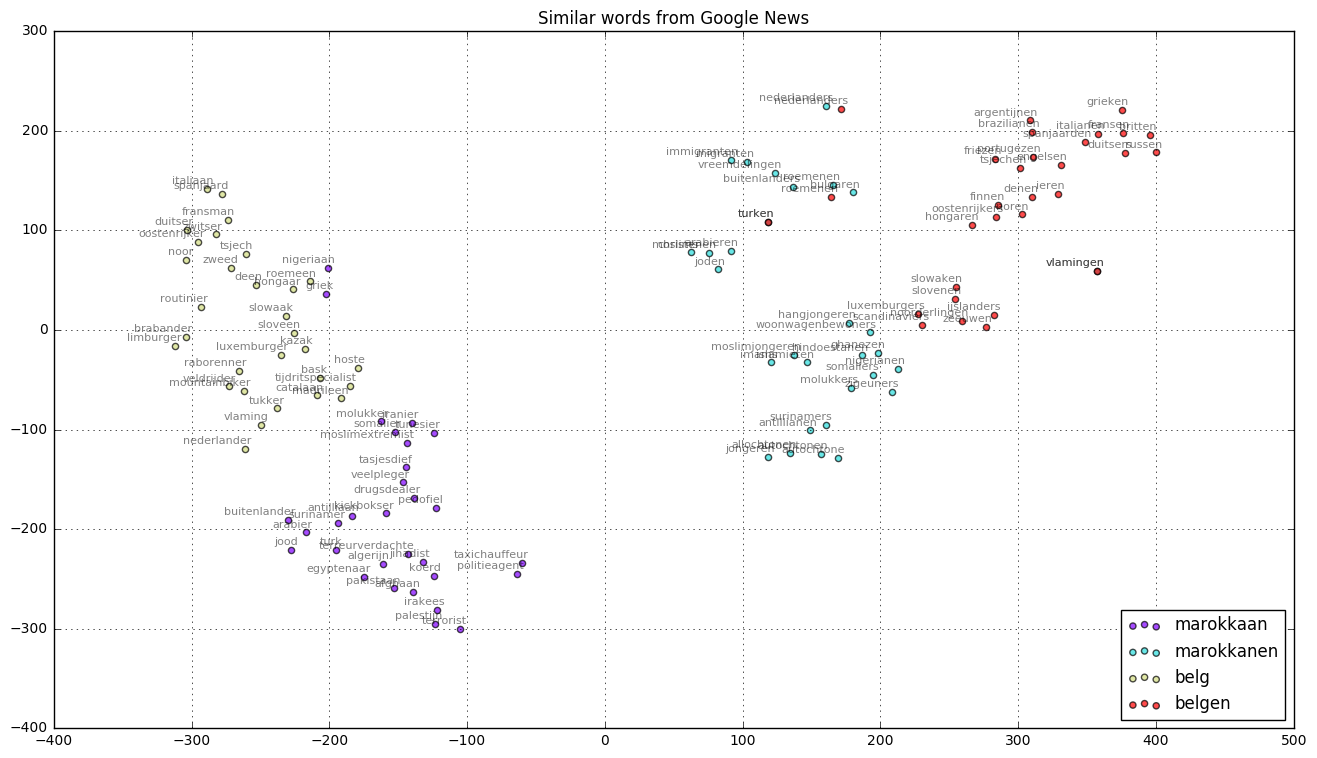

In [67]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('/Users/admin/surfdrive/Werk/projects/mediabias_p2/data/belgen_tabloid.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
fig.set_size_inches(18.5, 10.5)
fig

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.regplot(df['x'], df['y'])
sns.plt.show()

In [ ]:
word = 'turk'
s = all_np.wv.vocab.get(word).index
type(all_np.wv.vocab)

In [41]:
vocab_obj = all_np.wv.vocab["marokkanen"]
vocab_obj.count

KeyError: ('marokkanen', 'marokkaan')

In [ ]:
word = 'whatever'
i = all_np.wv.vocab.get(word).index
all_np.wv.index2word[i] == word

In [ ]:
# accuracy of the entire model

In [ ]:
acc_result = all_np.wv.accuracy("/Users/admin/gitprojects/accuracy_model/questions_2.txt")

In [ ]:
from pprint import pprint
for d in acc_result:
    correct = len(d['correct'])
    incorrect = len(d['incorrect'])
    print("\n The section: {} contains {} categories, of which {} is correct and {} incorrect: \n\n ---> {} accuracy".format(d['section'], correct + incorrect, correct, incorrect, correct / (correct + incorrect)))

In [ ]:
section = []
incorrect = []
correct = []

for d in acc_result:
    for i, (k, v) in enumerate(d.items()):
        if i == 2:
            print(v)
            section.append(v)
        else:
            if k == 'incorrect':
                incorrect_answer = len(v)
                incorrect.append(incorrect_answer)
                print("this is the incorrect answer: {}".format(incorrect_answer))
            if k == 'correct':
                correct_answer = len(v)
                correct.append(correct_answer)
                print("this is the correct answer: {}".format(correct_answer))
                print("this is total: {}".format(incorrect_answer + correct_answer))
                print("this is accuracy: {}".format(correct_answer / (incorrect_answer + correct_answer)))
#print("for {}, there are {} incorrect and {} correct answers".format(section, incorrect, correct))
            #print(k, len(v))
        #print(i, k, len(v))
section, correct, incorrect

In [ ]:
for d in acc_result:
    for i, (k, v) in enumerate(d.items()):
        if i == 2:
            print(v)

In [6]:
from gensim.test.utils import datapath

In [22]:
sentences = gensim.models.word2vec.PathLineSentences(PATH + FILENAME)
model = Word2Vec(sentences, iter=5)

In [25]:
model.most_similar('kat')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('stoornis', 0.8536829352378845),
 ('hond', 0.8503801822662354),
 ('tas', 0.8318495750427246),
 ('jas', 0.8268625736236572),
 ('liefhebber', 0.8221805691719055),
 ('huisdier', 0.8220964074134827),
 ('personage', 0.819879412651062),
 ('fantasie', 0.8184011578559875),
 ('stiefvader', 0.8144402503967285),
 ('tekening', 0.8129422664642334)]

In [ ]:
import json
import logging

from itertools import permutations
#from sppmimodel import SPPMIModel
import gensim
from gensim.models import Word2Vec

class Relation:
    """A class for making relationship/analogy tests easy"""

    def __init__(self, pathtoset):
        """
        A class which is used to test the accuracy of models viz. some set of questions/predicates.

        :param pathtoset: the path to the predicate set.
        :return: None
        """

        self.pathtoset = pathtoset

    def test_model(self, model):
        """
        Tests a given model with the set.

        :param model: the model for which to test accuracy
        :return: a dictionary with scores per section, and a total score.
        """

        # The most_similar assignment is neccessary because the most_similar function might refer to the original
        # Word2Vec function.
        return model.accuracy(self.pathtoset, most_similar=model.__class__.most_similar, restrict_vocab=None)

    @staticmethod
    def create_set(categories, outfile):
        """
        Creates a test-set .txt file for use in word2vec.
        Conforms to word2vec specs, from the google code repository: https://code.google.com/archive/p/word2vec/

        :param categories: The categories and words in the categories: {NAME: [[tuple_1],[tuple_2],...,[tuple_n]]}
        :param outfile: The file to which to write the text.
        :return: None
        """

        with open(outfile, 'w', encoding='utf8') as f:

            for k, v in categories.items():
                f.write(u": {0}\n".format(k))
                for x in permutations([" ".join(x).lower() for x in v], 2):
                    f.write(u"{0}\n".format(" ".join(x)))

if __name__ == "__main__":

    # Loads the category file for the Dutch relation test words.
    cats = json.load(open("/Users/anne/repos/dutchembeddings/data/semtest.json"))

    # Create the relation set tuples, and saves the result to question-words.txt
    Relation.create_set(cats, "/Users/anne/repos/dutchembeddings/data/question-words.txt")
    
    pathtomodel = "/Users/anne/repos/embedding_models/w2v_all_uniquesentences_pp2000-01-01_2016-12-31"
    model = gensim.models.Word2Vec.load(pathtomodel)

    rel = Relation("/Users/anne/repos/dutchembeddings/data/question-words.txt")
    scores = rel.test_model(model)

2019-01-29 14:01:41,727 : INFO : loading Word2Vec object from /Users/anne/repos/embedding_models/w2v_all_uniquesentences_pp2000-01-01_2016-12-31
2019-01-29 14:02:40,305 : INFO : loaded /Users/anne/repos/embedding_models/w2v_all_uniquesentences_pp2000-01-01_2016-12-31
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
2019-01-29 14:02:47,539 : INFO : precomputing L2-norms of word weight vectors


In [3]:
import gensim
import logging
import re

lettersanddotsonly = re.compile(r'[^a-zA-Z\.]')
PATH = "/Users/anne/repos/embedding_models/"
FILENAME = "uniekezinnen_testshort_2016-10-01_2016-12-31"

w2v_params = {
    'alpha': 0.025,
    'size': 100,
   # 'window': 15,
    'iter': 5,
    'min_count': 5,
    'sg': 1,
    'hs': 0,
    'negative': 5
}

def preprocess(s):
    s = s.lower().replace('!','.').replace('?','.')  # replace ! and ? by . for splitting sentences
    s = lettersanddotsonly.sub(' ',s)
    return s

class train_model():

    def __init__(self, fromdate,todate):
        self.fromdate = fromdate
        self.todate = todate
        
        self.sentences = gensim.models.word2vec.PathLineSentences(PATH + FILENAME)
    
        self.model = gensim.models.Word2Vec(**w2v_params)
        self.model.build_vocab(self.sentences)
        print('Build Word2Vec vocabulary')
        self.model.train(self.sentences,total_examples=self.model.corpus_count, epochs=self.model.iter)
        print('Estimated Word2Vec model')
        
def train_and_save(fromdate,todate):
    filename = "{}w2v_all__uniquesentences_{}_{}".format(PATH,fromdate,todate)

    casus = train_model(fromdate,todate)

    with open(filename, mode='wb') as fo:
        casus.model.save(fo)
    print('Saved model')
    print("reopen it with m = gensim.models.FastText.load('{}')".format(filename))
    del(casus)

if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

    train_and_save(fromdate = "2000-01-01", todate = "2016-12-31")

2019-01-29 13:21:44,716 : INFO : files read into PathLineSentences:/Users/anne/repos/embedding_models/uniekezinnen_testshort_2016-10-01_2016-12-31
2019-01-29 13:21:44,717 : INFO : collecting all words and their counts
2019-01-29 13:21:44,718 : INFO : reading file /Users/anne/repos/embedding_models/uniekezinnen_testshort_2016-10-01_2016-12-31
2019-01-29 13:21:44,723 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-01-29 13:21:44,835 : INFO : PROGRESS: at sentence #10000, processed 149668 words, keeping 22329 word types
2019-01-29 13:21:44,980 : INFO : PROGRESS: at sentence #20000, processed 297500 words, keeping 33752 word types
2019-01-29 13:21:45,094 : INFO : PROGRESS: at sentence #30000, processed 444673 words, keeping 42399 word types
2019-01-29 13:21:45,201 : INFO : PROGRESS: at sentence #40000, processed 592947 words, keeping 49881 word types
2019-01-29 13:21:45,314 : INFO : PROGRESS: at sentence #50000, processed 741119 words, keeping 56209 word typ

Build Word2Vec vocabulary


2019-01-29 13:21:50,662 : INFO : EPOCH 1 - PROGRESS: at 5.73% examples, 149777 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:21:51,669 : INFO : EPOCH 1 - PROGRESS: at 13.71% examples, 178939 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:21:52,682 : INFO : EPOCH 1 - PROGRESS: at 21.11% examples, 183290 words/s, in_qsize 6, out_qsize 0
2019-01-29 13:21:53,727 : INFO : EPOCH 1 - PROGRESS: at 29.40% examples, 189434 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:21:54,742 : INFO : EPOCH 1 - PROGRESS: at 37.68% examples, 194145 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:21:55,776 : INFO : EPOCH 1 - PROGRESS: at 45.95% examples, 196785 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:21:56,831 : INFO : EPOCH 1 - PROGRESS: at 54.44% examples, 199057 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:21:57,943 : INFO : EPOCH 1 - PROGRESS: at 59.41% examples, 188062 words/s, in_qsize 6, out_qsize 0
2019-01-29 13:21:59,017 : INFO : EPOCH 1 - PROGRESS: at 64.68% examples, 181158 words/s, in_qsize

2019-01-29 13:22:47,390 : INFO : EPOCH 5 - PROGRESS: at 6.56% examples, 167721 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:48,409 : INFO : EPOCH 5 - PROGRESS: at 14.27% examples, 183085 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:49,445 : INFO : EPOCH 5 - PROGRESS: at 21.68% examples, 184722 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:50,451 : INFO : EPOCH 5 - PROGRESS: at 29.66% examples, 190501 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:51,500 : INFO : EPOCH 5 - PROGRESS: at 37.95% examples, 193700 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:52,509 : INFO : EPOCH 5 - PROGRESS: at 46.23% examples, 197168 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:53,543 : INFO : EPOCH 5 - PROGRESS: at 54.44% examples, 198935 words/s, in_qsize 5, out_qsize 0
2019-01-29 13:22:54,543 : INFO : EPOCH 5 - PROGRESS: at 62.47% examples, 200217 words/s, in_qsize 6, out_qsize 0
2019-01-29 13:22:55,585 : INFO : EPOCH 5 - PROGRESS: at 70.72% examples, 201053 words/s, in_qsize

Estimated Word2Vec model


2019-01-29 13:22:59,697 : INFO : saved Word2Vec object


Saved model
reopen it with m = gensim.models.FastText.load('/Users/anne/repos/embedding_models/w2v_all__uniquesentences_2000-01-01_2016-12-31')


In [ ]:
#### create random combinations words that will be used for accuracy testing.

In [ ]:
similarities = all_np.evaluate_word_pairs(datapath('/Users/admin/gitprojects/accuracy_model/wordsim353_nl.tsv'))

In [ ]:
from pyemd import emd
from gensim.test.utils import datapath

In [ ]:
for i in acc_result:
    print(i)

In [ ]:
acc_yr2010 = yr2010.wv.accuracy("/Users/admin/gitprojects/accuracy_model/questions.txt")

In [ ]:
for d in acc_yr2001:
    for i, (k, v) in enumerate(d.items()):
        if i == 0:
            print("results for the category: {}".format(v))
        if i == 1:
            print("number of {} answers = {}".format(k, len(v)))
            correct_answer = len(v)
        if i == 2:
            print("number of {} answers = {}".format(k, len(v)))
            incorrect_answer = len(v)
            total = correct_answer + incorrect_answer
            accuracy = correct_answer / total
            print(total)
            print(accuracy)

In [ ]:
yr2001.most_similar(positive=['vrouw', 'koning'], negative=['man'], topn = 1)       

In [ ]:
yr2006.most_similar(positive=['athene', 'nederland'], negative=['amsterdam'], topn = 1)    

In [ ]:
yr2006.most_similar(positive=['berlijn', 'nederland'], negative=['amsterdam'], topn = 1)    

In [ ]:
yr2006.most_similar(positive=['bangkok', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
yr2001.most_similar(positive=['cairo', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
yr2012.most_similar(positive=['antwerpen', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['oslo', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.wv.accuracy()

In [ ]:
all_np.most_similar(positive=['ottawa', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [ ]:
neg_stem = [ps.stem(w) for w in neg_words]
neg_stem

In [ ]:
all_np.most_similar(positive=['parijs', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['hitler', 'beatrix'], topn = 1)  

In [ ]:
neg_words = 'afperser  agent  agente  arrestant  arrestanten  autodief  autokraker  bajesklant  bandiet  bandieten  bankovervaller  bankrover  bedelaar  bedreiger  bende  bendeleden  bendeleider  bendelid  benden  bendes  beroepscrimineel  berovingen  beschieting  beul  boef  bolletjesslikker  bolletjesslikkers  bommenmaker  bordelen  brandstichter  brandstichters  corrupt  criminaliteit  crimineel  criminelen  cyberpesten  dader  daders  delinquent  delinquenten  dief  draaideurcrimineel  drugsbaas  drugsbaron  drugsbende  drugsbendes  drugscrimineel  drugsdealer  drugsdealers  drugsgebruikers  drugshandelaar  drugshandelaars  drugssmokkelaar  dubbelagent  fietsendief  gangster  gangsterbende  gedetineerde  gedetineerden  gegijzelden  gevangenbewaarders  gevangene  gevangenen  gevangenisbewaarder  gevangenissen  geweldsman  gijzelaar  gijzelaars  gijzelnemer  gijzelnemers  handlanger  hardrijder  hoofdagent  hoofdagente  hoofddader  hoofdverdachte  hooligan  hooligans  huurmoord  huurmoordenaar  illegalen  inbreker  indringer  jeugdbende  jeugdbendes  jeugddelinquent  kaper  kapers  kidnapper  kidnappers  kinderlokker  kindermisbruiker  kindermoordenaar  kindslaven  krijgsgevangenen  kruimeldief  kunstdief  ladykiller  lastpak  lastpost  liquidatie  loverboy  lovergirls  lustmoordenaar  maffia  maffiabaas  maffiosi  maffioso  mafiabaas  massamoordenaar  massamoordenaars  mededader  medegedetineerde  medegevangene  medeplichtige  medeverdachte  mensenhandelaren  mensensmokkelaar  mensensmokkelaars  messentrekker  misdaden  misdadig  misdadiger  misdadigers  misdadigerwapenhandelaar  moordenaar  moordenaars  moordernaar  moordernaars  moordmachine  moordverdachte  motoragent  neerstak  neersteken  ontvoeringen  oplichter  overvaller  pedofiel  pedofielen  piraten  plunderaar  plunderaars  politieagent  politieagente  politieagenten  politiecommandant  politiegeneraal  politiegewonde  politieman  politiemannen  politiemensen  politieofficier  politiepost  politierechercheur  politiestaat  politievrouw  poltiemensen  pyromaan  recidivist  relschopper  relschoppers  roofmoord  roofoverval  scherpschutter  schutter  seriemoordenaar  skinheads  slaaf  slachtoffers  slaven  sluipschutter  sluipschutters  smokkelaar  smokkelaars  snelheidsduivel  souteneur  stalker  straatbende  strafbaar  strafklacht  struikrover  tasjesdief  terreurgroep  terreurverdachte  terrorist  uitbuiting  vechtersbaas  veelpleger  veelplegers  veiligheidsagent  veiligheidsagenten  veiligheidspolitie  verdachte  verkrachter  vermisten  voortvluchtige  vreemdeling  vrouwenhandelaar  wapenhandelaar  winkeldief  winkeldievegge  wreker  wurgmoord  zakkenrollers  zedendelinquent zedendelinquent  zedendeliquent  zelfmoordenaar  zwartrijder'

In [ ]:
neg_words = neg_words.lower().split()
neg_words

In [ ]:
sentence_dutch = "Duitsers gaan vaak op de fiets naar hun werk".lower().split()
sentence_dutch  = [w for w in sentence_dutch  if w not in stop_words]

sentence_mocro = "het zijn daders en ook nog een ja toch niet dan hoe zit dat dan dief".lower().split()
sentence_mocro  = [w for w in sentence_mocro if w not in stop_words]


all_np.wmdistance(sentence_mocro, neg_words), all_np.wmdistance(sentence_dutch, neg_words) 

In [ ]:
import numpy as np
from scipy import spatial

index2word_set = set(all_np.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
s1_afv = avg_feature_vector(nl_article, model=all_np, num_features=100, index2word_set=index2word_set)
s2_afv = avg_feature_vector(neg_words, model=all_np, num_features=100, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

In [ ]:
nl_article
nl_stem = [ps.stem(w) for w in nl_article]

In [ ]:
mocro_article = "De terreurbeweging Islamitische Staat (IS) heeft in Marokko relatief veel strijders geworven. De Marokkaanse minister van Justitie, Mustafa Ramid, zei vrijdag tegen parlementariërs dat er naar schatting ruim 1.200 Marokkanen naar Syrië en Irak zijn gegaan om zich aan te sluiten bij IS. Ramid schatte dat er wel 1.500 tot 2.000 Marokkaanse IS-jihadisten zijn, als Marokkanen uit Europese landen worden meegeteld. De Marokkaanse regering wil antiterrorismewetgeving verscherpen. Het aantal IS-strijders is onbekend. De meeste schattingen lopen uiteen van 20.000 tot 70.000. De beweging is Iraaks van origine en wordt aangevoerd door Iraakse ex-militairen. IS verraste dit jaar met een snelle opmars in Irak. De laatste tijd lijdt IS verliezen in Noord-Irak door toedoen van Koerdische strijders en luchtaanvallen van de internationale coalitie tegen IS."

In [ ]:
mocro_article ="Het was maandagavond opnieuw onrustig op het Mercatorplein. \\
Dit keer stonden er toeterende supporters van het Marokkaanse elftal, ook werd er met vuurwerk gegooid. \\
Er was veel politie op de been op het plein. Volgens een omstander zou er ook een man zijn aangehouden. Agenten probeerden het kruispunt, wat vol stond met scooters en enkele auto's, vrij te houden voor ander verkeer.  Later werd het Mercatorplein vanaf de Hoofdweg afgesloten. Agenten noteerden de kentekens van scooterrijders en automobilisten die zich niet aan de verkeersregels hielden. Veel agenten droegen bodycams, ook reed er een videoregistratiewagen van de politie rond. Rond middernacht vertrokken de meeste mensen van het plein. Iets later zorgden een paar groepjes jongeren nog voor overlast. Ze bekogelden agenten met eieren en gooiden een dynamo tegen een GVB-bus. Na ongeveer een kwartier vertrokken ze en keerde de rust terug op en rond het Mercatorplein. Marokko was al uitgeschakeld op het WK en wist ook vanavond niet te winnen. Het stond tot kort voor tijd met 2-1 voor tegen Spanje maar zag de Spanjaarden nog langszij komen. Met één punt uit drie wedstrijden eindigde Marokko achter Portugal, Spanje en Iran als laatste in de poule. Zondagavond stond het Mercatorplein al vol met aanhangers van de Turkse president Erdogan."

In [ ]:
mocro_article = "Volgens Brahim Bourzik van het Landelijk Beraad Marokkanen is het vijf over twaalf als het gaat om de aanpak van de Marokkaanse jeugd. Maar hoe hoog is de criminaliteit onder jongeren van Marokkaanse herkomst nu echt? Vijf vragen en antwoorden.ZIE OOK: Video: Marokkaanse ouders slaan alarm1. Wie bedoelen we eigenlijk als we het over 'de Marokkanen' hebben?Wie in de discussie over criminaliteitscijfers Marokkanen noemt, bedoelt vaak mensen van Marokkaanse herkomst die in Nederland wonen. Dat kunnen mensen met de Marokkaanse, maar ook met de Nederlandse nationaliteit zijn.Volgens de definitie van het CBS ben je van Marokkaanse herkomst als een van je ouders in Marokko is geboren. Als je ouders allebei in Nederland zijn geboren, en jij ook, dan ben je autochtoon.In Nederland wonen 16,8 miljoen mensen. 13,2 miljoen mensen zijn van autochtone herkomst, 3,5 miljoen mensen zijn allochtoon. Ongeveer 370.000 van hen zijn van Marokkaanse herkomst.2. Hoeveel criminaliteit is er onder Marokkanen? \\
De meeste Nederlanders van Marokkaanse herkomst zijn niet crimineel en zijn nog nooit als verdachte geregistreerd door de politie. Maar de Nederlanders van Marokkaanse herkomst zijn in de criminaliteitscijfers van het CBS wel oververtegenwoordigd.Dat betekent dat zij relatief vaak worden verdacht van een misdrijf, in verhouding tot mensen uit de meeste andere herkomstgroepen.3. Maar hoeveel criminelen van Marokkaanse herkomst zijn er dan?Uit de meest recente cijfers van het CBS blijkt onder andere:In 2012 werden gemiddeld 572 van de 10.000 inwoners van Marokkaanse herkomst in Nederland verdacht van een misdrijf. Onder autochtonen zijn dit er 106 per 10.000 inwoners. Onder mensen van Nederlands-Antilliaanse herkomst is dit aantal overigens hoger: 656.Met name mannen van Marokkaanse herkomst tussen de 18 en 25 worden vaak van misdrijven verdacht. 20,3 procent van hen werd in 2012 van een of meer misdrijven verdacht. Dat is meer dan vier keer zo veel als bij autochtone mannen van dezelfde leeftijd (4,5 procent).Van de jongens van Marokkaanse herkomst tussen de 12 en de 17 werd 13,1 procent in 2012 verdacht van een misdrijf. \\
Dat is vijf keer zo veel als onder autochtone jongens (2,6 procent). De laatste keer dat het CBS uitgebreid onderzoek publiceerde naar criminaliteit onder allochtonen, was het 'Jaarrapport Integratie' uit december 2012. Daarin staat onder andere:Mensen van Marokkaanse herkomst werden in 2010 22 keer zo vaak als autochtonen verdacht van 'vermogensdelicten met geweld' (waaronder overvallen met geweld). Voor mensen van Antilliaanse herkomst is dit overigens 23,9 keer.Van de jongens van Marokkaanse herkomst die in 1984 zijn geboren, werd 61,4 procent tussen 1996 (toen ze 12 werden) en 2010 één of meer keren van een misdrijf verdacht. Onder jongens van autochtone herkomst is dat 24,8 procent.Sinds 2005 neemt het aandeel verdachte minderjarige allochtonen verder toe ten opzichte van autochtonen. Dit geldt vooral voor Antillianen en Marokkanen. Marokkaanse minderjarigen werden in 2010 vijfmaal zo vaak verdacht als autochtone minderjarigen.""Over een periode van tien jaar is de oververtegenwoordiging van het aandeel allochtone verdachten ten opzichte van autochtone verdachten redelijk stabiel gebleven. Onder Marokkanen en Antilianen is het een tijd lang afgenomen maar sinds 2008 weer sterk toegenomen.\\
Komt dit niet gewoon omdat jongeren van Marokkaanse herkomst een achterstandspositie hebben? Daar zijn de onderzoekers in het 'Jaarrapport Integratie 2012' ook benieuwd naar. Het is bekend dat mensen met een zogenoemde 'lage sociaal-economische status' vaker verdacht worden van criminaliteit.Daarom hebben zij de criminaliteitscijfers gecorrigeerd. Na correctie voor verschillen in sociaaleconomische achtergrond neemt de criminele oververtegenwoordiging onder alle herkomstgroepen af, maar verdwijnt niet helemaal. Marokkanen en Antillianen worden ook na correctie nog steeds twee keer vaker verdacht van een misdrijf dan autochtonen., schrijven zij.Onder mensen van Turkse herkomst zijn de verschillen met autochtonen na de toegepaste correctie verdwenen, of minder geworden dan 100 procent. Maar bij mensen van Marokkaanse herkomst is dat dus niet zo.Met name mensen tussen de 18 en 38 uit de tweede generatie van Marokkaanse herkomst blijven oververtegenwoordigd: zij worden meer dan 3 keer zo vaak verdacht als vergelijkbare autochtonen.5. En hoe zit het met de werkloosheid onder jongeren van Marokkaanse herkomst?Daar gaat het Jaarrapport Integratie 2013 van het SCP uitgebreid op in. De werkloosheid onder jongeren tussen de 15 en de 24 van Marokkaanse herkomst is maar liefst 37 procent. Bij hun autochtone leeftijdsgenoten is dat maar 10 procent. Bovendien is het verschil tussen allochtonen en autochtonen sinds de crisis juist\\
toegenomen."

In [ ]:
koud = "aggressief onaardig boos onvriendelijk".lower().split()
koud = [w for w in koud  if w not in stop_words]

In [ ]:
mocro_article = mocro_article.lower().split()
mocro_article  = [w for w in mocro_article  if w not in stop_words]
mocro_stem = [ps.stem(w) for w in mocro_article]

In [ ]:
nl_article = "NEDERLAND ALS KAASLAND Volgens Britse wetenschappers waren mensen die in de Zwitserse alpen woonden, al 3000 jaar geleden in staat om kaas te maken. Hoewel de oudste bewijzen van het produceren van kaas in Nederland ‘pas’ uit 800 v.Chr. stammen, beschouwt men Nederland als een kaasland. Hoe heeft Nederland deze naam gekregen? Een overzicht van de kaasgeschiedenis van Nederland. Vroegste bewijzen van kaasproductie Na het onderzoeken van gevonden aardewerk potjes uit 800 v.Chr. bleek dat het bewijs was voor het maken van kaas in Nederland. De potjes waren namelijk gevuld met gaatjes, waarin de wrongel (samengeklonterde melk, na het toevoegen van stremsel) uitlekte en kon drogen. De eerste vermelding van kaas in Nederland in literatuur kwam van de hand van Caesar. In zijn boek De bello Gallico uit 57 v.Chr. liet hij weten dat in het huidige Nederland kaas werd gegeten." 

In [ ]:
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.

# Remove stopwords.
stop_words = stopwords.words('dutch')

In [ ]:
nl_article = "De gegevens van tienduizend gebruikers van de website ah.nl van supermarktketen Albert Heijn onbedoeld gedeeld door een programmeerfout. Hierdoor werden inlognamen en het wachtwoord kort zichtbaar in de URL.  De supermarkt heeft betrokken serviceproviders opdracht gegeven de informatie te verwijderen. Er is geen ongebruikelijke activiteit waargenomen met betrekking tot de inloggegevens of gebruikersaccounts. De Albert Heijn biedt hun oprechte verontschuldigingen aan, aan de betrokken klanten"

In [ ]:
nl_article ="Het lijkt er sterk op dat we in de toekomst weer een Formule 1-race in Nederland krijgen. Maar wordt het Zandvoort of Assen? En zou jij zo'n race bezoeken? Doe mee aan ons onderzoek! Lees hier meer over de toekomst van Formule 1 in Nederland."

In [ ]:
nl_article = nl_article.lower().split()
nl_article = [w for w in nl_article if w not in stop_words]
nl_article

In [ ]:
all_np.most_similar(positive=['rome', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['kabul', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['israel', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['jakarta', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['lissabon', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['madrid', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['bern', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
all_np.most_similar(positive=['stockholm', 'nederland'], negative=['amsterdam'], topn = 1)     

In [ ]:
unique_peryear = [len(yr2000.wv.vocab), len(yr2001.wv.vocab), len(yr2002.wv.vocab), len(yr2003.wv.vocab), len(yr2004.wv.vocab), len(yr2005.wv.vocab), len(yr2006.wv.vocab), len(yr2007.wv.vocab), len(yr2008.wv.vocab), len(yr2009.wv.vocab), len(yr2010.wv.vocab), len(yr2011.wv.vocab), len(yr2012.wv.vocab), len(yr2013.wv.vocab), len(yr2014.wv.vocab), len(yr2015.wv.vocab)]

In [ ]:
min(unique_peryear)

In [ ]:
all_np.wv.similarity('Brugge','Belgie')

In [ ]:
len(yr2003.wv.vocab)

In [ ]:
len(yr2000.wv.vocab)

In [ ]:
path = '/Users/admin/gitprojects/mediabias/ressources/'
crime = [line.strip() for line in open(path+'words_crime.txt').readlines() if len(line)>1]


low = [line.strip() for line in open(path+'words_lowlife.txt').readlines() if len(line)>1]
len(set(crime)), len(set(low))


In [ ]:
yr2000.vector_size

In [ ]:
import random 

def chunk(students, n):
    students = list(students)
    random.shuffle(students)
    slen = len(students)
    size = int(slen / n)
    chunks = [students[0+size*i: size*(i+1)] for i in range(n)]
    leftover = slen - size * n
    edge = size * n
    for i in range(leftover):
        chunks[i%n].append(students[edge+i])
    return chunks

In [ ]:
path = "/Users/admin/surfdrive/Werk/04_teaching/1819_ICW/"
lstudents = [line.strip() for line in open(path+'students.txt').readlines() if len(line)>1]

In [ ]:
from pprint import pprint
a = chunk(lstudents, 6)
for i, e in enumerate(a):
    print(i+1, *e, sep=" ")

## 1a. Target categories: 
### Bevolkingsgroepen
https://www.cbs.nl/nl-nl/achtergrond/2016/47/bevolking-naar-migratieachtergrond

In [ ]:
mad.wv.most_similar(positive='marokkaan', topn=100)

In [ ]:
mad.wv.most_similar(positive='marokkanen', topn=100)

In [ ]:
mad.wv.most_similar(positive='turk', topn=100)

In [ ]:
mad.wv.most_similar(positive='turken', topn=100)

In [ ]:
mad.wv.most_similar(positive='surinamer', topn=100)

In [ ]:
mad.wv.most_similar(positive='surinamers', topn=100)

In [ ]:
mad.wv.most_similar(positive='antilliaan', topn=100)

In [ ]:
mad.wv.most_similar(positive='antillianen', topn=100)

In [ ]:
mad.wv.most_similar(positive='irakees', topn=100)

In [ ]:
mad.wv.most_similar(positive='irakezen', topn=100)

In [ ]:
mad.wv.most_similar(positive='afghaan', topn=100)

In [ ]:
mad.wv.most_similar(positive='afghanen', topn=100)

In [ ]:
mad.wv.most_similar(positive='syrier', topn=100)

In [ ]:
mad.wv.most_similar(positive='syriers', topn=100)

In [ ]:
mad.wv.most_similar(positive='somalier', topn=100)

In [ ]:
mad.wv.most_similar(positive='somaliers', topn=100)

In [ ]:
mad.wv.most_similar(positive='pool', topn=100)

In [ ]:
mad.wv.most_similar(positive='polen', topn=100)

## 1b. Target categories: 
### Immigranten groups // labels. 

In [ ]:
mad.wv.most_similar(positive='arabier', topn=100)

In [ ]:
mad.wv.most_similar(positive='arabieren', topn=100)

In [ ]:
mad.wv.most_similar(positive='moslim', topn=100)

In [ ]:
mad.wv.most_similar(positive='moslims', topn=100)

In [ ]:
mad.wv.most_similar(positive='vluchteling', topn=100)

In [ ]:
mad.wv.most_similar(positive='vluchtelingen', topn=100)

In [ ]:
mad.wv.most_similar(positive='allochtoon', topn=100)

In [ ]:
mad.wv.most_similar(positive='allochtonen', topn=100)

In [ ]:
mad.wv.most_similar(positive='immigrant', topn=100)

In [ ]:
mad.wv.most_similar(positive='immigranten', topn=100)

In [ ]:
mad.wv.most_similar(positive='migrant', topn=100)

In [ ]:
mad.wv.most_similar(positive='migranten', topn=100)

In [ ]:
mad.wv.most_similar(positive='expat', topn=100)

In [ ]:
mad.wv.most_similar(positive='expats', topn=100)

# 1a. Reference categories
Selected on the basis of in-groups ('nederlander (s)' and 'wester(s)' as well as the largest west-european migrant groups living in the Netherlands, according to Statistics Netherlands:  https://www.cbs.nl/nl-nl/achtergrond/2016/47/bevolking-naar-migratieachtergrond)


In [ ]:
mad.wv.most_similar(positive='nederlander', topn=100)

In [ ]:
mad.wv.most_similar(positive='nederlanders', topn=100)

In [ ]:
mad.wv.most_similar(positive='belg', topn=100)

In [ ]:
mad.wv.most_similar(positive='belgen', topn=100)

In [ ]:
mad.wv.most_similar(positive='duitser', topn=100)

In [ ]:
mad.wv.most_similar(positive='duitsers', topn=100)

In [ ]:
mad.wv.most_similar(positive='westers', topn=100)

In [ ]:
mad.wv.most_similar(positive='christen', topn=100)

In [ ]:
mad.wv.most_similar(positive='christenen', topn=100)